<a href="https://colab.research.google.com/github/kartik162000/Skin_Cancer_Detection/blob/main/skin_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.18G/5.20G [01:51<00:00, 45.2MB/s]
100% 5.20G/5.20G [01:51<00:00, 50.1MB/s]


In [3]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [18]:
data=pd.read_csv('HAM10000_metadata.csv')
data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [19]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

data['cell_type'] = data['dx'].map(lesion_type_dict.get)
data['cell_type_idx'] = pd.Categorical(data['cell_type']).codes #Also Convert each lesion to  a numerical code.
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2


In [28]:
!mkdir '/content/skincancer/img/total_images'

In [34]:
import shutil
import glob
base_dir='/content/ham10000_images_part_1'
base_dir1='/content/skincancer/img/total_images'
l=glob.glob(base_dir + '/*.jpg')
for i in l:
  shutil.move(i,base_dir1)


In [36]:
for i in range(7):
    df = data[data["cell_type_idx"] == i]
    for j in df["image_id"].values:
         if not os.path.exists(os.path.join(base_dir1, 'train','type_'+str(i))):
             os.makedirs(os.path.join(base_dir1, 'train','type_'+str(i)))
         image=os.path.join(base_dir1,j+'.jpg')   
         shutil.move(image,os.path.join(base_dir1, 'train','type_'+str(i)))   

In [37]:
arr=os.listdir(os.path.join(base_dir1, 'train'))
arr

['type_0', 'type_3', 'type_2', 'type_4', 'type_5', 'type_1', 'type_6']

In [41]:
pth='/content/skincancer/train'
for cl in arr:
      img_path = os.path.join(pth, cl)
      images = glob.glob(img_path + '/*.jpg')
      # print("{}: {} Images".format(cl, len(images)))
      trains, test = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]
      for t in trains:
          if not os.path.exists(os.path.join('/content/skincancer','new_train',cl)):
              os.makedirs(os.path.join('/content/skincancer','new_train',cl))
          shutil.move(t, os.path.join('/content/skincancer','new_train',cl))
      for v in test:
          if not os.path.exists(os.path.join('/content/skincancer', 'test', cl)):
              os.makedirs(os.path.join('/content/skincancer', 'test', cl))
          shutil.move(v, os.path.join('/content/skincancer', 'test', cl))

In [109]:
from tensorflow.keras.preprocessing import image

In [49]:
for i in os.listdir('/content/skincancer/new_train'):
  print(len(os.listdir(os.path.join('/content/skincancer/new_train',i))))

210
74
703
4291
91
329
712


In [51]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import random
import cv2


In [52]:
im_gen  = ImageDataGenerator(
        rotation_range = 360,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        vertical_flip = True
)

In [55]:
for direct in arr:
    list_dir = os.listdir(os.path.join('/content/skincancer/new_train',direct))
    count = 0
    while count < 4291/len(list_dir): #to balance classes
        for imag in list_dir:
            # print(f"/content/skincancer/new_train/type_{direct[-1]}/{imag}")
            #pull image
            image1 = cv2.imread(f"/content/skincancer/new_train/type_{direct[-1]}/{imag}")
            #get random transformation
            im_dict = im_gen.get_random_transform((450,600,3))
            #apply it to image
            new_im = im_gen.apply_transform(image1, im_dict)
            image1 = Image.fromarray(new_im)
            # print(image1)
            #save image to new directory
            image1.save(f"/content/skincancer/final_augmented/type_{direct[-1]}/aug_{random.randint(1,10_000)}{count}.jpg")
        count += 1

In [60]:
for i in os.listdir('/content/skincancer/final_augmented'):
  print(len(os.listdir(os.path.join('/content/skincancer/final_augmented',i))))

4354
4278
4752
3499
4351
4532
5527


In [59]:
    for imag in list_dir:
        orig_im = Image.open(f"/content/skincancer/new_train/type_{direct[-1]}/{imag}")
        orig_im.save(f"/content/skincancer/final_augmented/type_{direct[-1]}/{imag}")
        

In [61]:
#imports
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import os
from os import listdir
os.environ['KMP_DUPLICATE_LIB_OK']='True' #needed this so that my kernel didn't die when plotting
import warnings
warnings.filterwarnings("ignore")

In [63]:
from keras.applications import MobileNetV2
#assigning model to variable to add to new model
#top fully connected layers not included
prior = MobileNetV2(include_top =  False, weights = "imagenet", input_shape = (150, 150, 3))

9412608/9406464 [==============================] - 0s 0us/step


In [65]:
model = Sequential()

model.add(prior)

model.add(Flatten())
# model.add(Dropout(rate = 0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(256, activation='relu'))
# model.add(Dropout(rate = 0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(64, activation='relu'))

model.add(Dense(7, activation='softmax'))

In [66]:
for layer in model.layers[0].layers:
    layer.trainable = False

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 32000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               16384512  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [68]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = adam,
              metrics = ['acc'])

In [71]:
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [70]:
class_weights = {
    0: 1,
    1: 1,
    2: 2,
    3: 1,
    4: 1,
    5: 1,
    6: 2
}

In [74]:
train_generator = train_datagen.flow_from_directory(
       '/content/skincancer/final_augmented',
        target_size=(150, 150), 
        batch_size= 256,
        class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
        '/content/skincancer/val',
        target_size=(150, 150),
        batch_size= 256,
        class_mode='categorical')

Found 31293 images belonging to 7 classes.
Found 2003 images belonging to 7 classes.


In [75]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (256, 150, 150, 3)
labels batch shape: (256, 7)


In [76]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# callbacks = [EarlyStopping(monitor= "val_loss", patience = 5, restore_best_weights= True),
#              ReduceLROnPlateau(monitor="loss", patience = 2)]


In [78]:
import numpy as np

#important to make sure steps are related to the batch size and image count
history = model.fit_generator(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=30,
      validation_data=validation_generator,
      validation_steps= len(validation_generator),
      # callbacks= callbacks,
      class_weight= class_weights
)

Epoch 1/30
123/123 [==============================] - 169s 1s/step - loss: 2.0082 - acc: 0.3486 - val_loss: 4.4635 - val_acc: 0.1388
Epoch 2/30
123/123 [==============================] - 164s 1s/step - loss: 1.8718 - acc: 0.3868 - val_loss: 7.2667 - val_acc: 0.1383
Epoch 3/30
123/123 [==============================] - 164s 1s/step - loss: 1.7613 - acc: 0.4276 - val_loss: 7.8132 - val_acc: 0.1328
Epoch 4/30
123/123 [==============================] - 163s 1s/step - loss: 1.6942 - acc: 0.4596 - val_loss: 7.2238 - val_acc: 0.1563
Epoch 5/30
123/123 [==============================] - 165s 1s/step - loss: 1.6292 - acc: 0.4860 - val_loss: 10.7039 - val_acc: 0.1403
Epoch 6/30
123/123 [==============================] - 167s 1s/step - loss: 1.5792 - acc: 0.5136 - val_loss: 6.9643 - val_acc: 0.1827
Epoch 7/30
123/123 [==============================] - 168s 1s/step - loss: 1.5387 - acc: 0.5295 - val_loss: 5.8899 - val_acc: 0.1752
Epoch 8/30
123/123 [==============================] - 168s 1s/step -

In [80]:
predss = model.predict(train_generator, steps =len(train_generator),verbose=2)

123/123 - 127s


In [81]:
predss

array([[5.0638622e-01, 3.8815621e-01, 5.1034577e-02, ..., 6.8668771e-04,
        1.0918295e-04, 1.4777597e-02],
       [2.3691694e-16, 5.8247800e-31, 1.0787685e-14, ..., 5.1257543e-06,
        1.8130086e-24, 9.9999487e-01],
       [1.7477389e-02, 1.0663603e-02, 2.4279839e-01, ..., 3.3054718e-01,
        1.1588887e-02, 3.5253951e-01],
       ...,
       [1.8716773e-05, 1.3047051e-05, 4.0977681e-03, ..., 1.4796332e-01,
        2.0432506e-06, 1.2929873e-03],
       [1.0285680e-01, 2.1804255e-02, 4.4634077e-01, ..., 7.3551528e-02,
        2.1899114e-03, 3.4001142e-01],
       [1.4593221e-02, 7.8356324e-04, 1.4220430e-01, ..., 2.3919083e-01,
        6.4870302e-04, 5.9621239e-01]], dtype=float32)

In [82]:
preds1 = np.argmax(predss, axis =1)
print(preds1)
print(predss)

[0 6 6 ... 3 2 6]
[[5.0638622e-01 3.8815621e-01 5.1034577e-02 ... 6.8668771e-04
  1.0918295e-04 1.4777597e-02]
 [2.3691694e-16 5.8247800e-31 1.0787685e-14 ... 5.1257543e-06
  1.8130086e-24 9.9999487e-01]
 [1.7477389e-02 1.0663603e-02 2.4279839e-01 ... 3.3054718e-01
  1.1588887e-02 3.5253951e-01]
 ...
 [1.8716773e-05 1.3047051e-05 4.0977681e-03 ... 1.4796332e-01
  2.0432506e-06 1.2929873e-03]
 [1.0285680e-01 2.1804255e-02 4.4634077e-01 ... 7.3551528e-02
  2.1899114e-03 3.4001142e-01]
 [1.4593221e-02 7.8356324e-04 1.4220430e-01 ... 2.3919083e-01
  6.4870302e-04 5.9621239e-01]]


In [83]:
from sklearn.metrics import accuracy_score

In [92]:
y_true = train_generator.classes
y_true.shape
accuracy_score(y_true, preds1)

0.1438340843000032

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

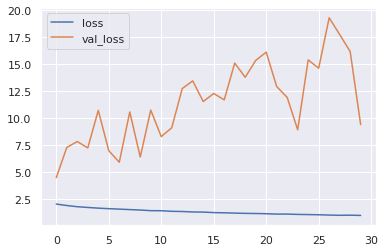

In [94]:
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend();

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [96]:
print(classification_report(y_true, preds1))

              precision    recall  f1-score   support

           0       0.14      0.11      0.12      4354
           1       0.15      0.18      0.17      4532
           2       0.15      0.21      0.17      4752
           3       0.13      0.12      0.12      4278
           4       0.11      0.11      0.11      3499
           5       0.14      0.14      0.14      4351
           6       0.18      0.14      0.16      5527

    accuracy                           0.14     31293
   macro avg       0.14      0.14      0.14     31293
weighted avg       0.14      0.14      0.14     31293



In [97]:
from google.colab import files
uploaded = files.upload()

Saving ISIC_0024329.jpg to ISIC_0024329.jpg


In [100]:
from IPython import display

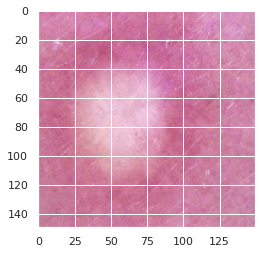

dermatofibroma


In [116]:
img=image.load_img('/content/skincancer/test/type_3/ISIC_0024386.jpg',target_size=(150,150))
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
#     print(images)
val=model.predict(images)
hu=np.argmax(val, axis =1)
if hu==0:
  print("Melanocytic nevi")
elif hu==1:
  print("dermatofibroma")
elif hu==2:
  print("Benign keratosis-like lesions")
elif hu==3:
  print("Basal cell carcinoma")
elif hu==4:
  print("Actinic keratoses")
elif hu==5:
  print("Vascular lesions")
elif hu==6:
    print("Dermatofibroma")

In [115]:
model.save("mymodel.h5")